In [25]:
import pandas as pd

In [27]:
# loading the original dataset
df = pd.read_csv("sap.csv")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18536\3042196903.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sap.csv")


In [29]:
# dropping 6 columns 
df.drop(columns=['Country Code', "short description","long description","Unit of measure", "Topic", "Indicator Code"], inplace=True)

In [31]:
# Select relevant columns
value_columns = df.columns[2:]  # Assuming the first 2 columns are metadata, and the rest are years
df_filtered = df[['Country Name', 'Indicator Name'] + list(value_columns)]
# df_filtered.head(10)
# Identify year columns (assuming they are numeric)
year_columns = [col for col in df.columns if col.isdigit()]

# Convert to long format (unpivot years)
df_long = df.melt(id_vars=["Country Name", "Indicator Name"], 
                  value_vars=year_columns, 
                  var_name="Year", 
                  value_name="Value")
# df_long.head(10)

# Convert Year to integer
df_long["Year"] = df_long["Year"].astype(int)

# Pivot table to align indicators as columns
df_pivot = df_long.pivot_table(index=["Country Name", "Year"], 
                               columns="Indicator Name", 
                               values="Value").reset_index()

In [33]:
# df_pivot would give you the pivoted dataset

In [35]:
df_pivot['Country Name'] = df_pivot['Country Name'].astype(str) + '_' + df_pivot['Year'].astype(str)
print(df_pivot)
df_pivot.drop(columns="Year", inplace=True)

Indicator Name      Country Name  Year  \
0               Afghanistan_2000  2000   
1               Afghanistan_2001  2001   
2               Afghanistan_2002  2002   
3               Afghanistan_2003  2003   
4               Afghanistan_2004  2004   
...                          ...   ...   
6355               Zimbabwe_2019  2019   
6356               Zimbabwe_2020  2020   
6357               Zimbabwe_2021  2021   
6358               Zimbabwe_2022  2022   
6359               Zimbabwe_2023  2023   

Indicator Name  Access to clean fuels and technologies for cooking (% of population)  \
0                                                             5.5                      
1                                                             6.6                      
2                                                             7.7                      
3                                                             9.0                      
4                                                      

In [37]:
# check df_pivot again -> the Year column should not be there: 
print(df_pivot)
df_pivot.to_csv("modified.csv", index = False)

Indicator Name      Country Name  \
0               Afghanistan_2000   
1               Afghanistan_2001   
2               Afghanistan_2002   
3               Afghanistan_2003   
4               Afghanistan_2004   
...                          ...   
6355               Zimbabwe_2019   
6356               Zimbabwe_2020   
6357               Zimbabwe_2021   
6358               Zimbabwe_2022   
6359               Zimbabwe_2023   

Indicator Name  Access to clean fuels and technologies for cooking (% of population)  \
0                                                             5.5                      
1                                                             6.6                      
2                                                             7.7                      
3                                                             9.0                      
4                                                            10.5                      
...                                    

In [39]:
# the pivoted dataset with the Country Name and Year columns combined and the Year column dropped is now called: modified_sap.csv

In [43]:
# now we handle missing values using backward and forward filling: 
# Load the dataset
df = pd.read_csv('modified.csv')

# Split 'Country_Year' into separate 'Country' and 'Year' columns
df[['Country', 'Year']] = df['Country Name'].str.split('_', expand=True)

# Convert 'Year' to integer for correct sorting
df['Year'] = df['Year'].astype(int)

# Sort by Country and Year to ensure proper time-series order
df.sort_values(by=['Country', 'Year'], inplace=True)

# Apply forward fill, then backward fill within each country
df.fillna(method='ffill', inplace=True)  # Forward Fill
df.fillna(method='bfill', inplace=True)  # Backward Fill

# Recreate 'Country_Year' column
df['Country_Year'] = df['Country'] + '_' + df['Year'].astype(str)

# Drop the separate 'Country' and 'Year' columns (optional)
df.drop(columns=['Country', 'Year'], inplace=True)

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

print("Missing values handled using Forward & Backward Fill.")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18536\3032777591.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward Fill
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18536\3032777591.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward Fill


Missing values handled using Forward & Backward Fill.


In [45]:
df = pd.read_csv("cleaned_dataset.csv")

[0]	validation_0-rmse:0.88946	validation_1-rmse:0.91639
[1]	validation_0-rmse:0.81225	validation_1-rmse:0.85358
[2]	validation_0-rmse:0.75548	validation_1-rmse:0.79922
[3]	validation_0-rmse:0.71837	validation_1-rmse:0.76876
[4]	validation_0-rmse:0.67794	validation_1-rmse:0.73977
[5]	validation_0-rmse:0.65009	validation_1-rmse:0.71884
[6]	validation_0-rmse:0.62487	validation_1-rmse:0.69579
[7]	validation_0-rmse:0.59540	validation_1-rmse:0.66934
[8]	validation_0-rmse:0.58443	validation_1-rmse:0.66056
[9]	validation_0-rmse:0.56187	validation_1-rmse:0.64151
[10]	validation_0-rmse:0.54844	validation_1-rmse:0.63067
[11]	validation_0-rmse:0.52026	validation_1-rmse:0.60912
[12]	validation_0-rmse:0.50228	validation_1-rmse:0.59262
[13]	validation_0-rmse:0.47408	validation_1-rmse:0.56982
[14]	validation_0-rmse:0.46336	validation_1-rmse:0.56102
[15]	validation_0-rmse:0.45151	validation_1-rmse:0.55260
[16]	validation_0-rmse:0.43454	validation_1-rmse:0.54121
[17]	validation_0-rmse:0.41905	validation

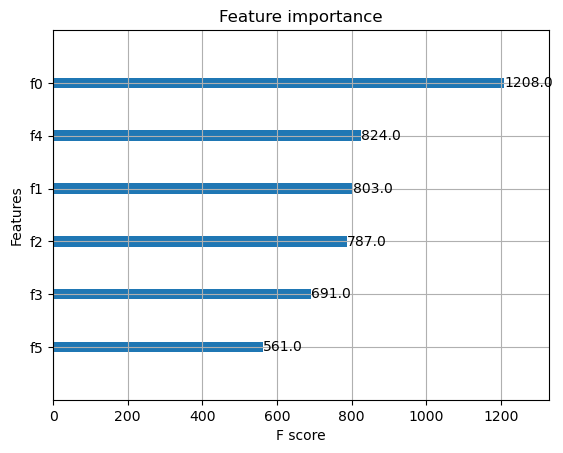


Predictions (Y_pred_scaled):
[ 0.82624435 -0.3102086   0.6020563  ...  1.547986   -0.7876949
  0.34685162]
Number of predictions: 1272

Actual test values (Y_test_scaled):
[ 0.84647586 -0.61073612  0.84647586 ...  1.66641129 -0.78933592
  0.70846692]
Number of test values: 1272

Final Model Performance:
Mean Squared Error: 0.11714810446831797
Root Mean Squared Error (RMSE): 0.3422690527469844
Mean Absolute Error (MAE): 0.19918286979052288


<Figure size 1000x600 with 0 Axes>

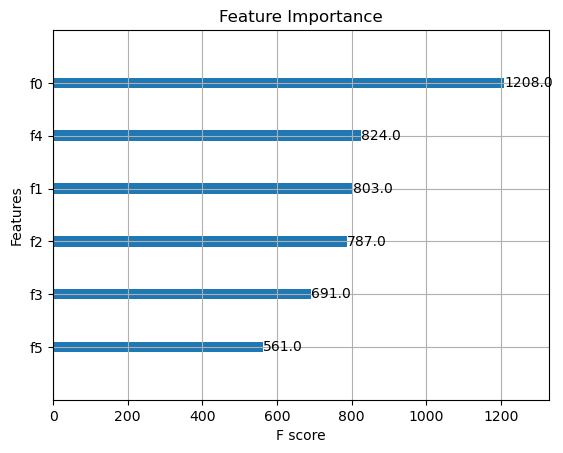

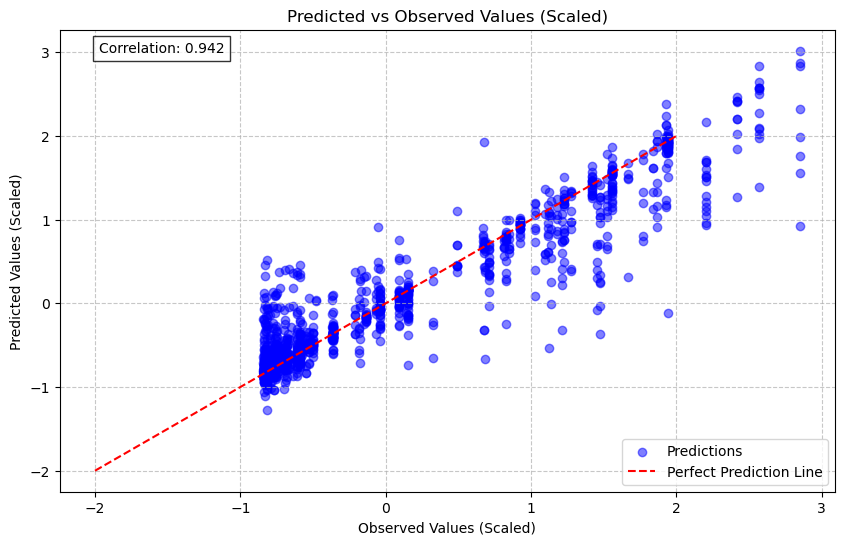

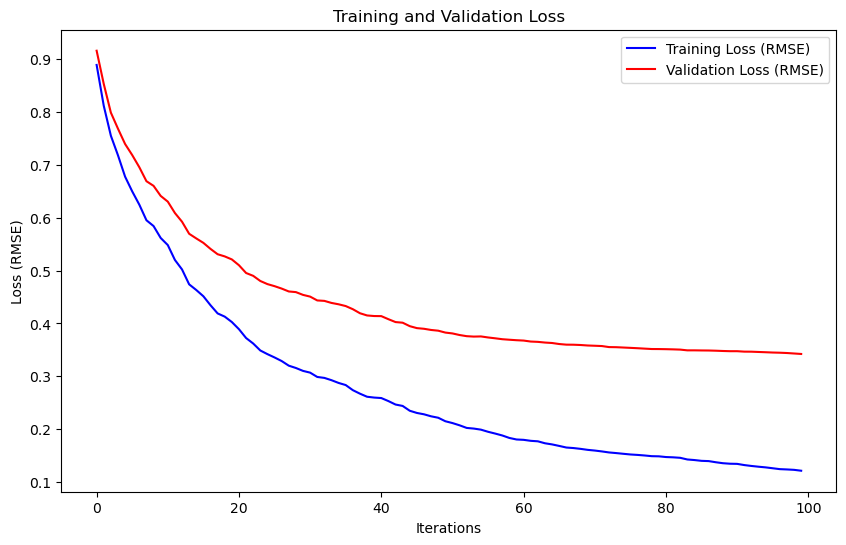

In [47]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the feature columns and target variable
X_columns = [
    'Urban population (% of total population)', 
    'Multilateral debt service (% of public and publicly guaranteed debt service)', 
    'Adjusted savings: education expenditure (current US$)', 
    'Political Stability and Absence of Violence/Terrorism: Estimate', 
    'Literacy rate, adult total (% of people ages 15 and above)', 
    'Access to electricity (% of population)'
]

#     "Adequacy of social protection and labor programs (% of total welfare of beneficiary households)",
#     "Access to clean fuels and technologies for cooking (% of population)",
#     "Age dependency ratio (% of working-age population)",
#     "Access to electricity (% of population)",
#     "Adjusted net national income per capita (current US$)",
#     "Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)",
#     "Adolescents out of school, male (% of male lower secondary school age)",
#     "Adjusted savings: education expenditure (current US$)",
#     "Adequacy of social insurance programs (% of total welfare of beneficiary households)",
#     "Adolescents out of school, female (% of female lower secondary school age)",
#     "Adolescent fertility rate (births per 1,000 women ages 15-19)",
#     "Adolescents out of school (% of lower secondary school age)",
#     "Adequacy of social safety net programs (% of total welfare of beneficiary households)"
    
# ]

Y_column = 'Multidimensional poverty headcount ratio (UNDP) (% of population)'

# Prepare X (features) and Y (target)
X = df[X_columns]
Y = df[Y_column]

# Step 1: Split the data into training and test sets (85-15 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Step 2: Scale the features and target variable using StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_Y = StandardScaler()
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1))

# Ensure Y_train_scaled is a 1D array for XGBoost
Y_train_scaled = Y_train_scaled.ravel()
Y_test_scaled = Y_test_scaled.ravel()

# Step 3: Initialize and train the XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Define evaluation sets (training and validation data)
eval_set = [(X_train_scaled, Y_train_scaled), (X_test_scaled, Y_test_scaled)]

# Train the model with evaluation monitoring
model.fit(X_train_scaled, Y_train_scaled, eval_set=eval_set, verbose=True)

# Step 4: Make predictions on the test set
Y_pred_scaled = model.predict(X_test_scaled)

# Step 5: Evaluate the model using Mean Squared Error (MSE), RMSE, and MAE
mse = mean_squared_error(Y_test_scaled, Y_pred_scaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_scaled, Y_pred_scaled)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Step 6: Plot feature importance (Optional)
xgb.plot_importance(model)
plt.show()

# Step 7: Ensure Y_test and Y_pred_scaled are 1D arrays for plotting
Y_test_flat = Y_test.values.reshape(-1, 1).ravel()  # Flatten Y_test to 1D
Y_pred_flat = Y_pred_scaled.ravel()  # Flatten predictions to 1D

# Print predictions and test values with their lengths
print("\nPredictions (Y_pred_scaled):")
print(Y_pred_scaled)
print(f"Number of predictions: {len(Y_pred_scaled)}")

print("\nActual test values (Y_test_scaled):")
print(Y_test_scaled)
print(f"Number of test values: {len(Y_test_scaled)}")




# Print evaluation metrics
print('\nFinal Model Performance:')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Step 7: Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Plot scaled predicted vs observed values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_scaled, Y_pred_scaled, color='blue', alpha=0.5, label='Predictions')
plt.plot([-2, 2], [-2, 2], 'r--', label='Perfect Prediction Line')  # Reference line
plt.xlabel("Observed Values (Scaled)")
plt.ylabel("Predicted Values (Scaled)")
plt.title("Predicted vs Observed Values (Scaled)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add correlation coefficient
correlation = np.corrcoef(Y_test_scaled, Y_pred_scaled)[0,1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Step 10: Plot the Training and Validation Loss
eval_results = model.evals_result()
train_rmse = eval_results['validation_0']['rmse']
val_rmse = eval_results['validation_1']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(range(len(train_rmse)), train_rmse, label='Training Loss (RMSE)', color='blue')
plt.plot(range(len(val_rmse)), val_rmse, label='Validation Loss (RMSE)', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (RMSE)')
plt.legend()
plt.show()


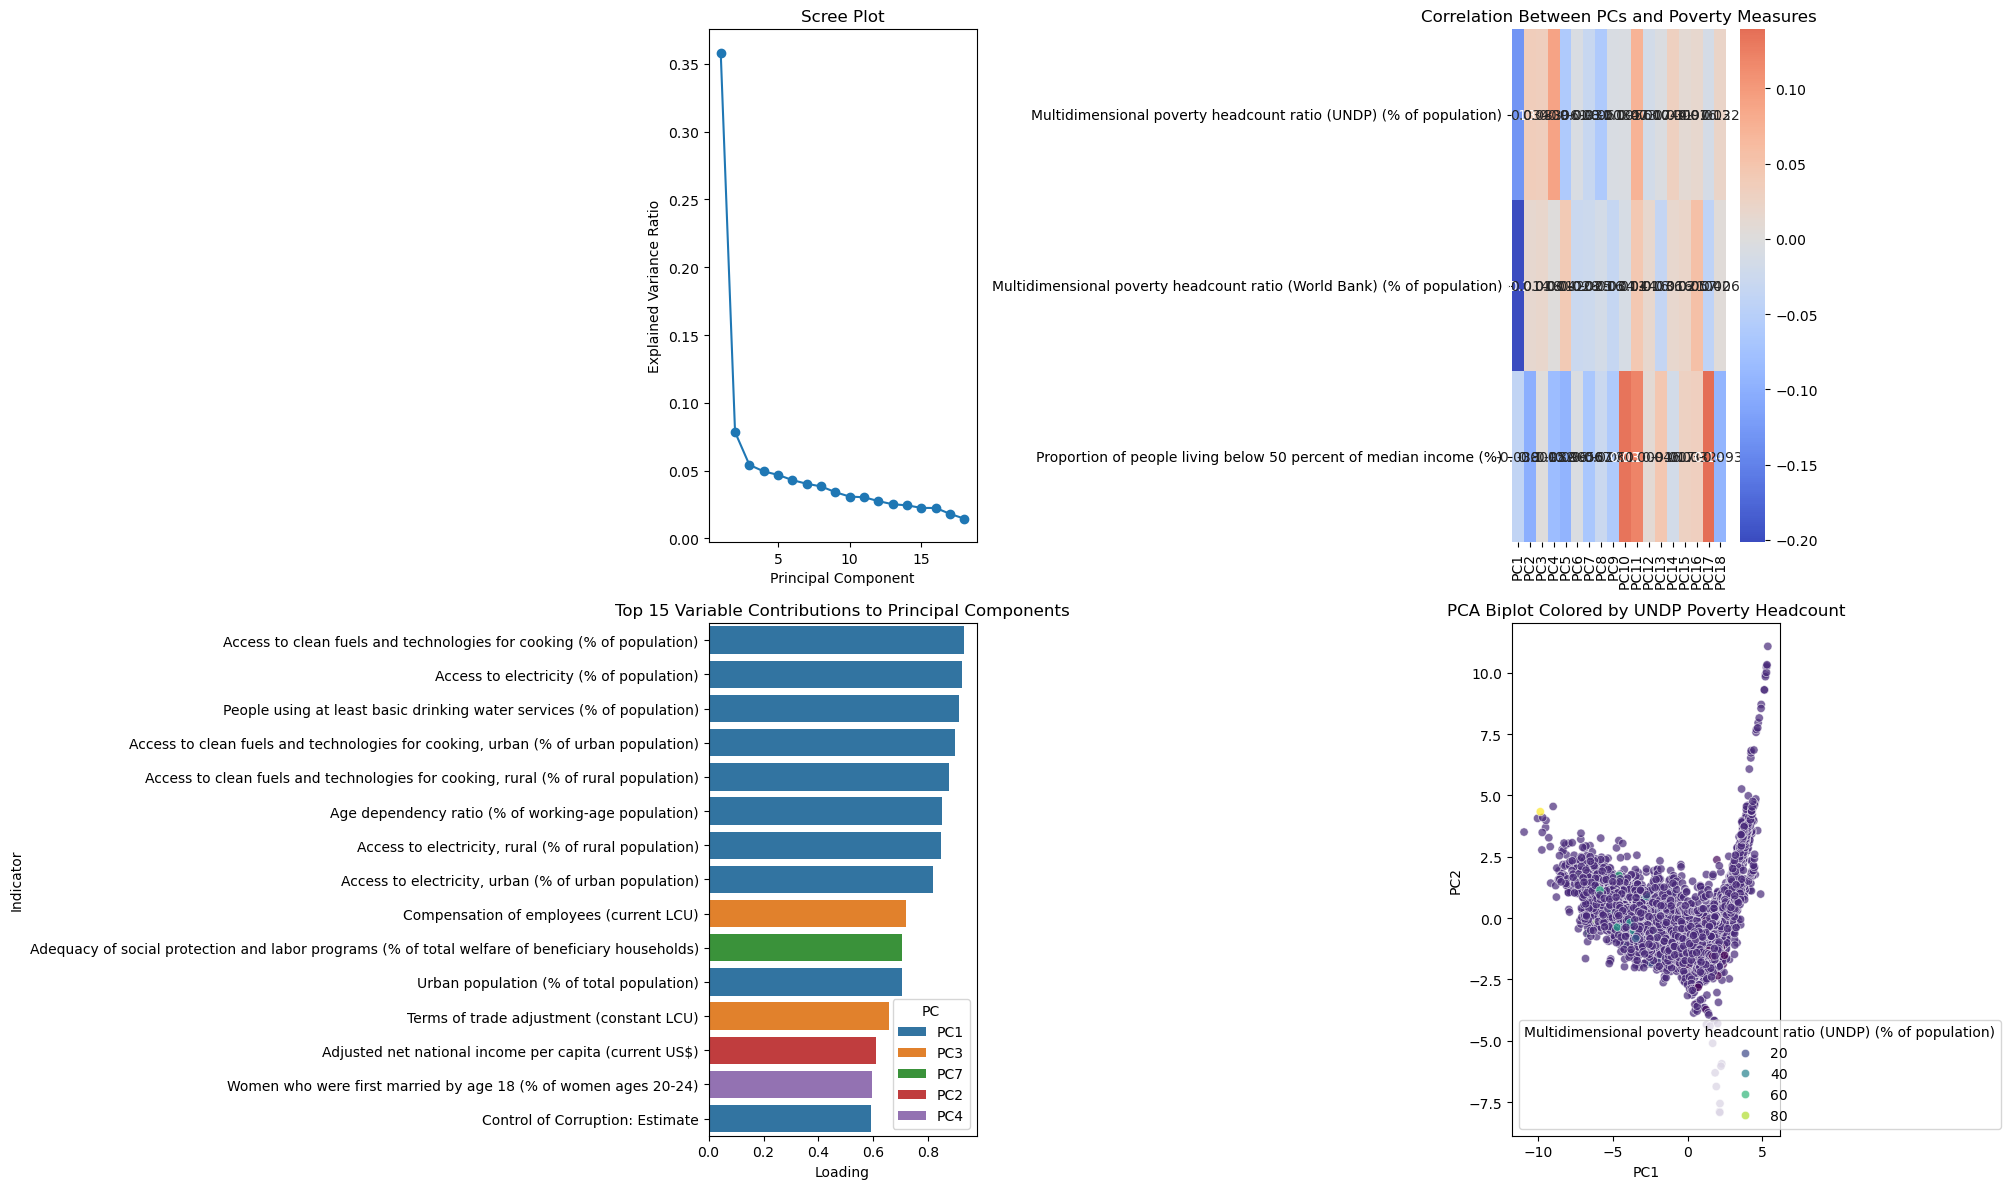

Explained Variance Ratios: [0.35824031 0.07846784 0.05427445 0.04946317 0.04689399 0.04304233
 0.04033449 0.03840752 0.03411762 0.03088351 0.03040074 0.02754569
 0.02522447 0.02444394 0.02252621 0.02250564 0.01810401 0.01458578]
Cumulative Variance: [0.35824031 0.43670815 0.49098259 0.54044576 0.58733976 0.63038209
 0.67071657 0.70912409 0.74324171 0.77412522 0.80452596 0.83207165
 0.85729612 0.88174006 0.90426626 0.9267719  0.94487591 0.95946169]


In [49]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sap.csv', dtype={"Topic": str}, low_memory=False)
year_columns = [col for col in df.columns if col.isdigit()]

df_long = df.melt(
    id_vars=["Country Name", "Indicator Name", "Topic", "Indicator Code"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Value"
)
df_long["Year"] = df_long["Year"].astype(int)

df_pivot = df_long.pivot_table(
    index=["Country Name", "Year"],
    columns="Indicator Name",
    values="Value"
).reset_index()

target_indicators = [
    "Control of Corruption: Estimate",
    "Compensation of employees (current LCU)",
    "Compensation of employees (% of expense)",
    "Political Stability and Absence of Violence/Terrorism: Estimate",
    "Multilateral debt service (% of public and publicly guaranteed debt service)",
    "Adjusted savings: education expenditure (current US$)",
    "Adjusted net national income per capita (current US$)",
    "Terms of trade adjustment (constant LCU)",
    "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "Access to clean fuels and technologies for cooking (% of population)",
    "Access to electricity, rural (% of rural population)",
    "Access to electricity, urban (% of urban population)",
    "Access to electricity (% of population)",
    "Urban population (% of total population)",
    "Adequacy of social protection and labor programs (% of total welfare of beneficiary households)",
    "Unemployment, total (% of total labor force) (national estimate)",
    "Literacy rate, adult total (% of people ages 15 and above)",
    "School enrollment, primary (gross), gender parity index (GPI)",
    "Children out of school (% of primary school age)",
    "People using at least basic drinking water services (% of population)",
    "Current health expenditure (% of GDP)",
    "Births attended by skilled health staff (% of total)",
    "Age dependency ratio (% of working-age population)",
    "Women who were first married by age 18 (% of women ages 20-24)"
]

# we're not including the 3 poverty measures....maybe the third one shouldn't be here tho
poverty_measures = [
    "Multidimensional poverty headcount ratio (UNDP) (% of population)",
    "Multidimensional poverty headcount ratio (World Bank) (% of population)",
    "Proportion of people living below 50 percent of median income (%)"
]

analysis_df = df_pivot[["Country Name", "Year"] + poverty_measures + target_indicators].copy()

for col in poverty_measures + target_indicators:
    analysis_df[col] = pd.to_numeric(analysis_df[col], errors='coerce')

imputer = SimpleImputer(strategy='median')
analysis_df[target_indicators] = imputer.fit_transform(analysis_df[target_indicators])
analysis_df[poverty_measures] = imputer.fit_transform(analysis_df[poverty_measures])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(analysis_df[target_indicators])

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(principal_components, 
                     columns=[f'PC{i+1}' for i in range(pca.n_components_)])

full_df = pd.concat([analysis_df.reset_index(drop=True), pca_df], axis=1)

corr_matrix = full_df[poverty_measures + list(pca_df.columns)].corr()

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(2, 2, 2)
sns.heatmap(corr_matrix.loc[poverty_measures, pca_df.columns], 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between PCs and Poverty Measures')

loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_),
                       columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                       index=target_indicators)

plt.subplot(2, 2, 3)
top_loadings = loadings.abs().stack().nlargest(15).reset_index()
top_loadings.columns = ['Indicator', 'PC', 'Loading']
sns.barplot(x='Loading', y='Indicator', hue='PC', data=top_loadings)
plt.title('Top 15 Variable Contributions to Principal Components')

plt.subplot(2, 2, 4)
sns.scatterplot(x='PC1', y='PC2', data=full_df, 
                hue='Multidimensional poverty headcount ratio (UNDP) (% of population)', 
                palette='viridis', alpha=0.7)
plt.title('PCA Biplot Colored by UNDP Poverty Headcount')
plt.tight_layout()
plt.show()

print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Cumulative Variance:", np.cumsum(pca.explained_variance_ratio_))

In [51]:
pc_mpi = ["PC1", "PC11", "PC5", "PC17", "PC4"]
mpi_equation = loadings[pc_mpi].sum(axis=1)
print(mpi_equation.sort_values(ascending=False))

Urban population (% of total population)                                                           1.376118
Political Stability and Absence of Violence/Terrorism: Estimate                                    1.323153
Control of Corruption: Estimate                                                                    1.085502
People using at least basic drinking water services (% of population)                              0.973629
Access to electricity (% of population)                                                            0.876427
Access to electricity, urban (% of urban population)                                               0.782247
Access to clean fuels and technologies for cooking (% of population)                               0.751125
Access to clean fuels and technologies for cooking, urban (% of urban population)                  0.684818
School enrollment, primary (gross), gender parity index (GPI)                                      0.645565
Access to electricity, rural

In [53]:
df1 = pd.read_csv('hdr_general.csv', encoding='ISO-8859-1')

# Keep only the desired columns
df1 = df1[['country', 'hdi', 'year']]

# Merge 'country' and 'year' into a new column
df1['Country_Year'] = df1['country'].astype(str) + '_' + df1['year'].astype(str)

# Drop the original 'country' and 'year' columns if not needed
df1 = df1[['Country_Year', 'hdi']]

# Display the first few rows
print(df1.head())

       Country_Year    hdi
0  Afghanistan_1990  0.284
1  Afghanistan_1991  0.292
2  Afghanistan_1992  0.299
3  Afghanistan_1993  0.307
4  Afghanistan_1994  0.300


In [55]:
df2 = pd.read_csv('cleaned_dataset.csv', encoding='ISO-8859-1')  # Contains Country_year (2000-2023)

# Filter df1 to keep only HDI values from 2000 to 2022
df1['year'] = df1['Country_Year'].str.split('_').str[1].astype(int)  # Extract the year
df1 = df1[(df1['year'] >= 2000) & (df1['year'] <= 2022)]  # Keep only 2000-2022

# Drop the extracted 'year' column as it's no longer needed
df1 = df1[['Country_Year', 'hdi']]

# Merge df1 into df2 based on 'Country_year'
df2 = df2.merge(df1, on='Country_Year', how='left')

# Save the updated dataset (optional)
df2.to_csv('cleaned_with_hdi.csv', index=False)

# Display the first few rows
print(df2.head())

       Country Name  \
0  Afghanistan_2000   
1  Afghanistan_2001   
2  Afghanistan_2002   
3  Afghanistan_2003   
4  Afghanistan_2004   

   Access to clean fuels and technologies for cooking (% of population)  \
0                                                5.5                      
1                                                6.6                      
2                                                7.7                      
3                                                9.0                      
4                                               10.5                      

   Access to clean fuels and technologies for cooking, rural (% of rural population)  \
0                                                0.8                                   
1                                                1.0                                   
2                                                1.3                                   
3                                                1.6      

In [57]:
import pandas as pd
df = pd.read_csv("cleaned_with_hdi.csv")
# Load the dataset
# Extract the country name and year by splitting the 'Country_Name' column
df[['Country', 'Year']] = df['Country Name'].str.split('_', expand=True)

# Convert the 'Year' column to integer
df['Year'] = df['Year'].astype(int)

# Filter the data for the years 2018-2023
df_recent = df[df['Year'].between(2018, 2023)]

# Filter rows where MPI > 0.15
df_recent_affected = df_recent[df_recent['Multidimensional poverty headcount ratio (UNDP) (% of population)'] > 15]

# Count how many years MPI > 0.15 for each country
affected_counts = df_recent_affected.groupby('Country').size()

# Filter countries that have MPI > 0.15 in at least 4 out of the last 5 years
countries_with_4_years = affected_counts[affected_counts >= 4].index

# Display the unique country names
print(countries_with_4_years)

Index(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Bangladesh', 'Benin', 'Bermuda', 'Bhutan',
       ...
       'Solomon Islands', 'Somalia', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=108)


In [ ]:
df = pd.read_csv("cleaned_with_hdi.csv")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("cleaned_with_hdi.csv")

# Extract the country name and year from the 'Country_Year' column
df[['Country', 'Year']] = df['Country_Year'].str.split('_', expand=True)

# Convert the 'Year' column to integer
df['Year'] = df['Year'].astype(int)

# Filter the data for the years 2018-2023
df_recent = df[df['Year'].between(2018, 2023)]

# Filter rows where MPI > 0.15 (Multidimensional poverty headcount ratio)
df_recent_affected = df_recent[df_recent['Multidimensional poverty headcount ratio (UNDP) (% of population)'] > 15]

# Count how many years MPI > 0.15 for each country
affected_counts = df_recent_affected.groupby('Country').size()

# Filter countries that have MPI > 0.15 in at least 4 out of the last 5 years
countries_with_4_years = affected_counts[affected_counts >= 4].index

# Filter the cleaned dataset for the most affected countries
df_cleaned = df[df['Country'].isin(countries_with_4_years)]

# Now applying PCA

# Define the features for PCA
features = ['Multidimensional poverty headcount ratio (UNDP) (% of population)', 
            'Adjusted net national income per capita (current US$)', 
            'Access to electricity (% of population)', 
            'Unemployment, total (% of total labor force) (national estimate)']

# Select the relevant columns and drop rows with missing values
df_pca = df_cleaned[features].dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Apply PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(principal_components, 
                      columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Concatenate the PCA results with the original data
full_df = pd.concat([df_cleaned.reset_index(drop=True), pca_df], axis=1)

# Plot the results
plt.figure(figsize=(18, 12))

# Scree plot
plt.subplot(2, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Heatmap of correlations between PCA components and selected features
corr_matrix = full_df[features + list(pca_df.columns)].corr()
plt.subplot(2, 2, 2)
sns.heatmap(corr_matrix.loc[features, pca_df.columns], 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between PCs and Features')

# Top loadings
loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_),
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=features)

plt.subplot(2, 2, 3)
top_loadings = loadings.abs().stack().nlargest(15).reset_index()
top_loadings.columns = ['Feature', 'PC', 'Loading']
sns.barplot(x='Loading', y='Feature', hue='PC', data=top_loadings)
plt.title('Top 15 Feature Contributions to Principal Components')

# PCA Biplot
plt.subplot(2, 2, 4)
sns.scatterplot(x='PC1', y='PC2', data=full_df, 
                hue='Multidimensional poverty headcount ratio (UNDP) (% of population)', 
                palette='viridis', alpha=0.7)
plt.title('PCA Biplot Colored by MPI')

plt.tight_layout()
plt.show()

# Print explained variance ratios
print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Cumulative Variance:", np.cumsum(pca.explained_variance_ratio_))
